In [1]:
## --skrypt realizujacy symulacje dla przykladuz wahadlem matematycznym bez tlumienia (zajecia 1 )
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 150 

In [3]:
# -- wyprowadzenie modelu matematycznego przedstawiam krok po kroku w filmie, dostępnym na YT
# https://youtu.be/BP613iafk5o

In [4]:
# -dane wejsciowe
g = 9.81
l = 1.2

In [5]:
# -model matematyczny
A = np.identity(2)
B = np.zeros((2, 2))

# zapewnienie spojnosci modelu
B[1, 0] = -1

#-wprowadzanie wspolczynnika tlumienia do ukladu rownan
B[0, 0] = 0.5

#-tworze pusty wektor prawej strony ukladu rownan
F = np.zeros((2, 1))

In [6]:
#-definicja dziedziny czasu
t0 = 0
tf = 20
dt = 1E-4
t = np.arange(t0, tf, dt)

In [7]:
#-definicja warunkow poczatkowych
y0 = np.array([[9], [0*np.pi]])

In [8]:
#-alokacja pamieci na wyniki
wyn = np.zeros((2, t.size))
#-tworze zmienna pomocnicza na wyniki poszczegolnych iteracji
Result = y0.copy()

In [9]:
#----procedura obliczeniowa-------
#-wprowadzanie warunku poczatkowego do tablicy na wyniki
for i in range(0, max(y0.shape)):
    wyn[i, 0] = y0[i]

#-definiuje funkcje typu in-line do wyznaczania wartosci chwilowych dla prawej strony ukladu rownan
f = lambda x: (-g/l)*np.sin(x)

#-implementuje rozwiazanie numeryczne metoda Euler'a
for k in range(0, max(t.shape)-1):
    F[0] = f(Result[1])
    Result += np.linalg.inv(A) @ (F - B @ Result) * dt
    wyn[0, k+1] = Result[0]
    wyn[1, k+1] = Result[1]

Text(0.5, 1.0, 'wychylenie')

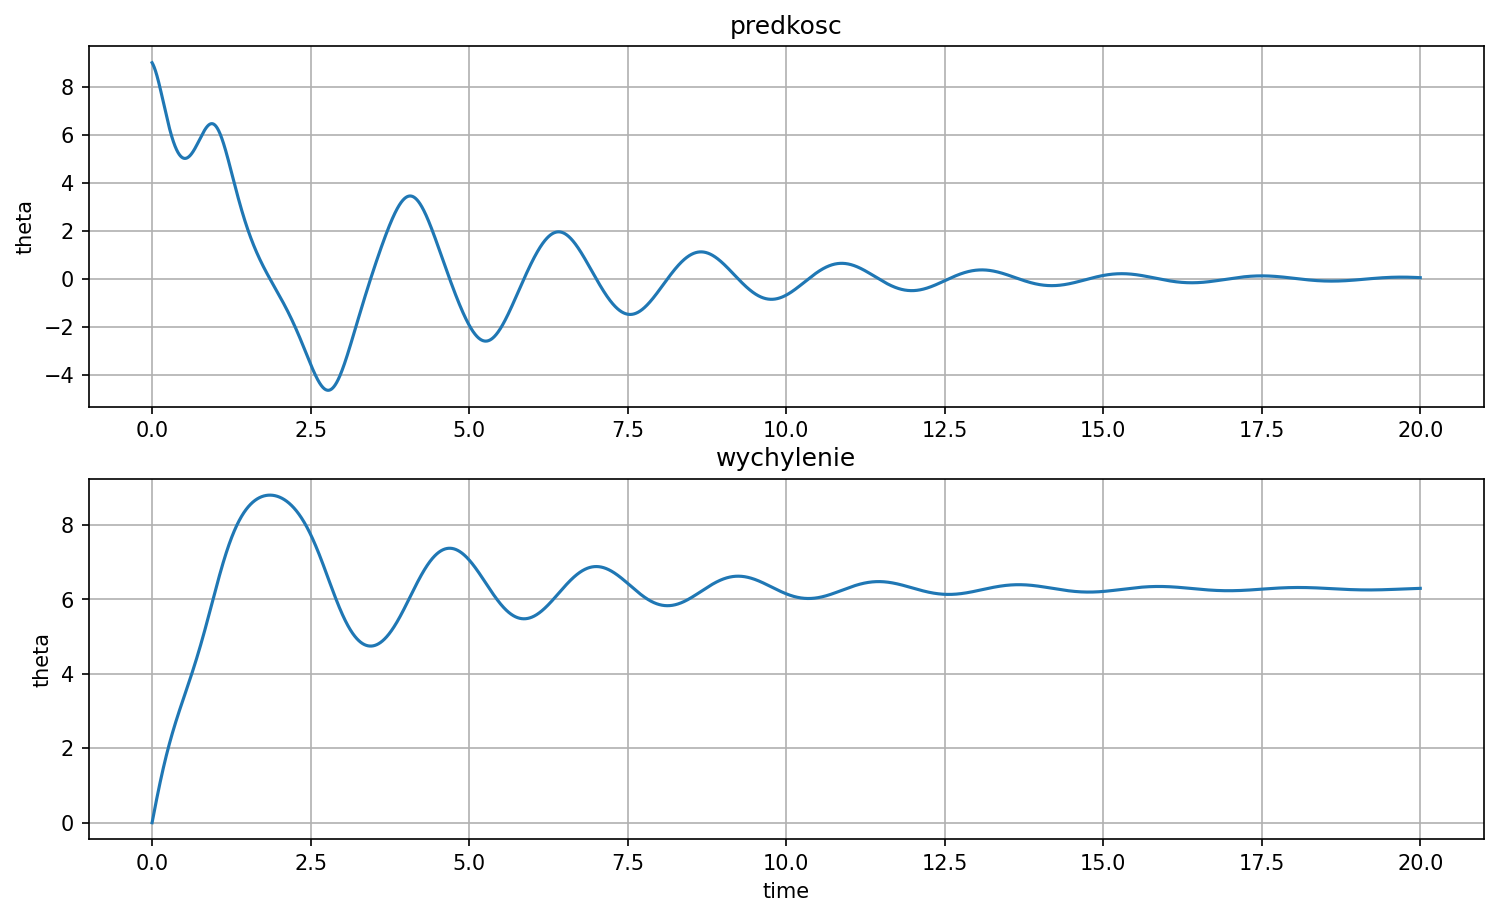

In [10]:
# -rysowanie wykresu 
fig, axs = plt.subplots(2)

axs[0].plot(t, wyn[0, :])
axs[0].grid()
# axs[0].set_xlabel('time')
axs[0].set_ylabel('theta')
axs[0].set_title('predkosc')

axs[1].plot(t, wyn[1,:])
axs[1].grid()
axs[1].set_xlabel('time')
axs[1].set_ylabel('theta')
axs[1].set_title('wychylenie')


In [11]:
# -- definicja plaszczyzny 
theta = np.linspace(-3*np.pi, 3*np.pi, 50)
omega = np.linspace(-10, 10, 50)
# print(theta.shape)

In [12]:
#alokacja pamieci
phase = np.zeros((max(theta.shape), max(omega.shape), 2))

In [13]:
#definicja pomocniczej funkcji lambda
FF = lambda x: np.array([[(-g/l*np.sin(x))], [0]], dtype=object)

In [14]:
# obliczenia skladowych pola wektorowego na podstawie zaleznosci opisującej dynamike ukladu czyli: f'(x)
x = np.zeros((2,1))
ph = np.zeros((max(theta.shape), max(omega.shape), 2))
fprime = lambda x: np.linalg.inv(A) @ (FF(x[1]) - B @ x)
for i in range(max(theta.shape)):
    for j in range(max(omega.shape)):
        dif = fprime(np.array([[theta[i]], [omega[j]]]))
        ph[i, j, 0] = dif[0]
        ph[i, j, 1] = dif[1]

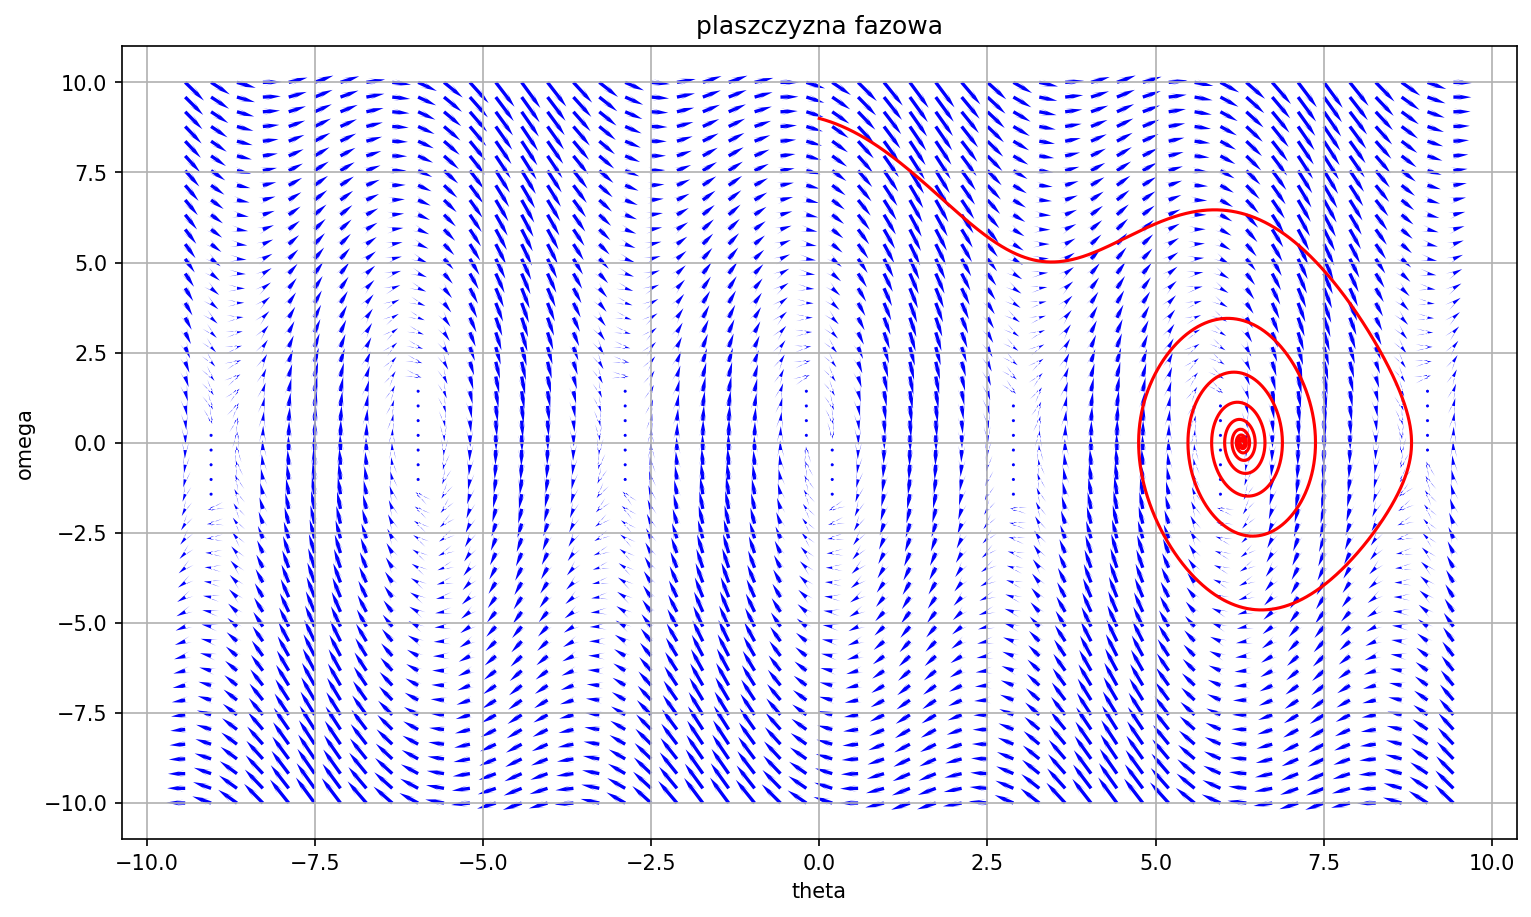

In [15]:
plt.figure(2)
plt.quiver(theta, omega, ph[:,:,1], ph[:,:,0], minshaft=0.2, color='blue', headwidth=2, headlength=5, 
          headaxislength=3)
plt.xlabel('theta')
plt.ylabel('omega')
plt.title('plaszczyzna fazowa')
plt.grid()
# -- dodaje przebieg rozwiazania
plt.plot(wyn[1,:], wyn[0,:], color='red')